<a href="https://colab.research.google.com/github/NoaNesher/MATALA2_Regular_Expressions_and_Pandas/blob/main/MATALA2_Regular_Expressions_%2B_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**MATALA2: Regular Expressions + Pandas**


##**Noa Nesher**
###**ID:318879533**







In [21]:
import pandas as pd
import numpy as np
import re
import datetime
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
path = '/content/drive/MyDrive/data/'
fileNAME ='matala2_cosmetics_2019-Nov.csv'
data = pd.read_csv(path + fileNAME)
DF = data.copy()

<ipython-input-22-71c4b97796dc>:3: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path + fileNAME)


##**Section 1**

In [23]:
DF['event_time'] = DF['event_time'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S UTC'))

In [24]:
DF = DF.sort_values(['user_id', 'user_session', 'event_time'])
DF["next_event_time"] = DF.groupby(['user_id', 'user_session'])['event_time'].shift(-1)
DF["duration_to_next"] = (DF["next_event_time"] - DF["event_time"]).dt.total_seconds()
DF["duration_to_next"] = DF["duration_to_next"].fillna(0)
DF = DF.drop("next_event_time" , axis=1)

**test:**

In [25]:
DF[DF["user_session"]=="00007819-3646-099d-f895-f36bb77191c9"]

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next
2067074,2019-11-16 07:25:14,view,5783987,1487580005268456287,NaN,NaN,4.75,563291665,00007819-3646-099d-f895-f36bb77191c9,132.0
2067275,2019-11-16 07:27:26,view,5591314,1487580005268456287,NaN,NaN,4.29,563291665,00007819-3646-099d-f895-f36bb77191c9,64.0
2067371,2019-11-16 07:28:30,view,5772167,1487580005268456287,NaN,grattol,6.27,563291665,00007819-3646-099d-f895-f36bb77191c9,63.0
2067472,2019-11-16 07:29:33,view,5806922,1487580005092295511,NaN,grattol,6.27,563291665,00007819-3646-099d-f895-f36bb77191c9,0.0


##**Section 2**

In [26]:
DF = DF.sort_values(['user_id', 'event_time'])

DF['time_diff'] = DF.groupby('user_id')['event_time'].diff()
DF['time_diff'] = DF['time_diff'].apply(lambda x: x.days)
DF['new_panel'] = (DF['time_diff'] > 5) | DF['time_diff'].isnull()
DF['funnel_number'] = DF.groupby('user_id')['new_panel'].cumsum()

DF = DF.drop(['time_diff', 'new_panel'], axis=1)

**test:**

In [27]:
DF[DF["user_id"] == 420448483]

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next,funnel_number
13954,2019-11-01 06:39:43,cart,5900636,1487580007675986893,NaN,NaN,0.0,420448483,7eade47d-02c6-44f6-991c-f9aa602f8a99,9.0,1
13962,2019-11-01 06:39:52,cart,5900633,1487580007675986893,NaN,NaN,0.0,420448483,7eade47d-02c6-44f6-991c-f9aa602f8a99,16.0,1
13983,2019-11-01 06:40:08,cart,5900628,1487580007675986893,NaN,NaN,0.0,420448483,7eade47d-02c6-44f6-991c-f9aa602f8a99,20.0,1
14003,2019-11-01 06:40:28,cart,5900621,1487580007675986893,NaN,NaN,0.0,420448483,7eade47d-02c6-44f6-991c-f9aa602f8a99,19.0,1
14024,2019-11-01 06:40:47,cart,5900613,1487580007675986893,NaN,NaN,0.0,420448483,7eade47d-02c6-44f6-991c-f9aa602f8a99,99.0,1
14158,2019-11-01 06:42:26,cart,5900360,1487580007675986893,NaN,freedecor,1.43,420448483,7eade47d-02c6-44f6-991c-f9aa602f8a99,8.0,1
14169,2019-11-01 06:42:34,cart,5900357,1487580007675986893,NaN,freedecor,1.43,420448483,7eade47d-02c6-44f6-991c-f9aa602f8a99,431.0,1
14803,2019-11-01 06:49:45,cart,5899359,1487580006551913373,NaN,NaN,4.44,420448483,7eade47d-02c6-44f6-991c-f9aa602f8a99,555.0,1
15753,2019-11-01 06:59:00,cart,5896414,1487580009051717646,NaN,jessnail,36.51,420448483,7eade47d-02c6-44f6-991c-f9aa602f8a99,105.0,1
15978,2019-11-01 07:00:45,cart,5895783,1487580012591710363,NaN,NaN,1.21,420448483,7eade47d-02c6-44f6-991c-f9aa602f8a99,5.0,1


##**Section 3**

In [28]:
DF = DF.sort_values(['user_id', 'event_time'])
DF['index_in_funnel'] = DF.groupby(['user_id', 'funnel_number'])['user_session'].transform(lambda x: pd.factorize(x)[0] + 1)

**test:**

In [29]:
DF[DF["user_id"] == 420448483]

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next,funnel_number,index_in_funnel
13954,2019-11-01 06:39:43,cart,5900636,1487580007675986893,NaN,NaN,0.0,420448483,7eade47d-02c6-44f6-991c-f9aa602f8a99,9.0,1,1
13962,2019-11-01 06:39:52,cart,5900633,1487580007675986893,NaN,NaN,0.0,420448483,7eade47d-02c6-44f6-991c-f9aa602f8a99,16.0,1,1
13983,2019-11-01 06:40:08,cart,5900628,1487580007675986893,NaN,NaN,0.0,420448483,7eade47d-02c6-44f6-991c-f9aa602f8a99,20.0,1,1
14003,2019-11-01 06:40:28,cart,5900621,1487580007675986893,NaN,NaN,0.0,420448483,7eade47d-02c6-44f6-991c-f9aa602f8a99,19.0,1,1
14024,2019-11-01 06:40:47,cart,5900613,1487580007675986893,NaN,NaN,0.0,420448483,7eade47d-02c6-44f6-991c-f9aa602f8a99,99.0,1,1
14158,2019-11-01 06:42:26,cart,5900360,1487580007675986893,NaN,freedecor,1.43,420448483,7eade47d-02c6-44f6-991c-f9aa602f8a99,8.0,1,1
14169,2019-11-01 06:42:34,cart,5900357,1487580007675986893,NaN,freedecor,1.43,420448483,7eade47d-02c6-44f6-991c-f9aa602f8a99,431.0,1,1
14803,2019-11-01 06:49:45,cart,5899359,1487580006551913373,NaN,NaN,4.44,420448483,7eade47d-02c6-44f6-991c-f9aa602f8a99,555.0,1,1
15753,2019-11-01 06:59:00,cart,5896414,1487580009051717646,NaN,jessnail,36.51,420448483,7eade47d-02c6-44f6-991c-f9aa602f8a99,105.0,1,1
15978,2019-11-01 07:00:45,cart,5895783,1487580012591710363,NaN,NaN,1.21,420448483,7eade47d-02c6-44f6-991c-f9aa602f8a99,5.0,1,1


##**Section 4**

In [30]:
def re_price(price):
    if isinstance(price, str):
        match = re.search(r'\d+\.?\d*', price)
        if match:
            return float(match.group())
    elif isinstance(price, float):
        return price
    return None

In [31]:
DF['price'] = DF['price'].apply(re_price)

**test:**

In [32]:
DF['price'].info()

<class 'pandas.core.series.Series'>
Int64Index: 4635837 entries, 437209 to 4635836
Series name: price
Non-Null Count    Dtype  
--------------    -----  
4635837 non-null  float64
dtypes: float64(1)
memory usage: 70.7 MB


In [33]:
DF.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next,funnel_number,index_in_funnel
437209,2019-11-04 15:28:57,view,5240,1487580009202712597,NaN,runail,4.05,1120748,d0484d94-7ac1-44e8-a310-2360da11ad9d,0.0,1,1
2483241,2019-11-19 09:56:09,view,5711145,1487580005008409427,NaN,f.o.x,6.03,1458813,b16644a2-44db-4650-8156-f6f03782d432,0.0,1,1
2494623,2019-11-19 11:14:48,view,5814066,1487580005855658874,NaN,grattol,2.30,1458813,6873a205-d9f5-4d51-b3eb-b4bfddfe907c,0.0,1,2
2640971,2019-11-20 11:58:06,view,5800358,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,21.0,1,3
2641003,2019-11-20 11:58:27,view,5800349,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,72.0,1,3


##**Section 5**

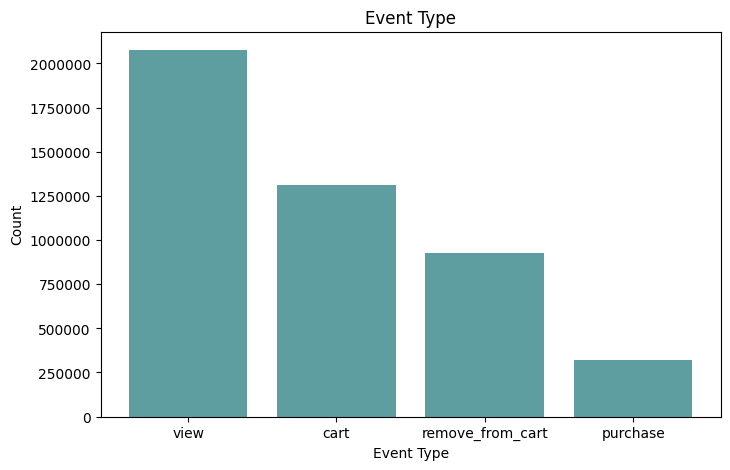

In [34]:
fig, (ax) = plt.subplots(1, figsize=(8, 5))

ax.bar(DF['event_type'].value_counts().index, DF['event_type'].value_counts().values, color='#5F9EA0')
ax.set_title('Event Type')
ax.set_xlabel('Event Type')
ax.set_ylabel('Count')
ax.ticklabel_format(style='plain', axis='y')

plt.show()

In [35]:
counts_df = pd.DataFrame({"Event Type": DF['event_type'].value_counts().index, "Count": DF['event_type'].value_counts().values})
counts_df

,Event Type,Count
0,view,2076132
1,cart,1311807
2,remove_from_cart,925481
3,purchase,322417


##**Section 6**

In [36]:
session_summary = DF.groupby(['user_session']).agg({
    'event_type': lambda x: list(x),
    'product_id': lambda x: list(x),
    'user_id': 'first',
    'funnel_number': 'first',
    'index_in_funnel': 'first',
    'duration_to_next': 'sum',
    'brand': lambda x: len(x)
}).reset_index()

In [37]:
session_summary['list_of_added_to_cart'] = session_summary.apply(lambda x: [i for i, j in zip(x['product_id'], x['event_type']) if j == 'cart'], axis=1)
session_summary['list_of_viewed'] = session_summary.apply(lambda x: [i for i, j in zip(x['product_id'], x['event_type']) if j == 'view'], axis=1)
session_summary['list_of_purchased'] = session_summary.apply(lambda x: [i for i, j in zip(x['product_id'], x['event_type']) if j == 'purchase'], axis=1)

session_summary = session_summary.rename(columns={'duration_to_next': 'duration_of_the_visit'})
session_summary = session_summary.rename(columns={'brand': 'amount_of_events'})

session_summary = session_summary.drop(['product_id', 'event_type'], axis=1)

**test:**

In [38]:
session_summary.head()

,user_session,user_id,funnel_number,index_in_funnel,duration_of_the_visit,amount_of_events,list_of_added_to_cart,list_of_viewed,list_of_purchased
0,00000dd2-0f5d-4fc9-9d6b-2fc8c7514b04,556321594,1,1,0.0,1,[],[5829298],[]
1,00001bc6-1e04-4861-be5d-1bc73929c21a,570103701,1,2,0.0,1,[],[5771614],[]
2,00001e77-5db8-4e96-ab7a-022ed3caf8b3,571677620,1,1,0.0,1,[],[5568472],[]
3,00004c7d-9507-474e-a559-0fdaccaaa390,504468592,2,6,0.0,1,[],[5864850],[]
4,0000597b-de39-4a77-9fe5-02c8792ca14e,571211128,1,2,151.0,3,[],"[5861620, 5861619, 5861591]",[]
